# 0. Introduction


Make sure that you are in the `astrohack` environment using Anaconda Python. If this is not the case -- or you have no idea what I mean by that -- follow the instructions at [this page](https://github.com/rutgers-physics-ml/astro-hack-2018-spring). Afterwards, you can deploy a Jupyter notebook by running in the `astrohack` environment:

    jupyter notebook
    
and then navigating the directory tree:

```
astro-hack-2018-spring
├── data
├── doc
├── notebook
│   ├── session-1
│   ├── session-2
│   ├── session-3
│   └── session-4
├── results
└── src
```

to `./notebooks/session-1` and then opening the first notebook. 

If everything looks good, then let's get started right away with examples. 

## Running code

There are different kinds of cells in Jupyter notebooks. This text is in a cell (using the `Markdown` typesetting language). Some cells have `In [1]:` next to them; those are `Code` cells. You can change the code in them by selecting them and then typing whatever you want. Press `<Shift-Enter>` to run the code in the cell.


## Variables

In Python, variables are declared without explicit types.

In [1]:
x = 3
y = 4.5

print('x = {:d} and is has type {:s}.'.format(x, type(x).__name__))
print('y = {:.1f} and is has type {:s}.'.format(y, type(y).__name__))

x = 3 and is has type int.
y = 4.5 and is has type float.


## Integers and simple operators

In Python 3, integers divide as floating point numbers. In Python 2, integer division (`//`) is the default.

In [2]:
5 / 3

1.6666666666666667

In [3]:
5 // 3

1

In [4]:
5 % 3

2

In [5]:
4**2

16

In [6]:
4**3

64

In [7]:
7 - (5 - 2)

4

## Lists, iterables, and loops

Iterables are always 0-indexed.

In [8]:
my_favorite_list = [3, -0.5, 'pineapples']

print(my_favorite_list[0])
print(my_favorite_list[1])
print(my_favorite_list[2])

3
-0.5
pineapples


In [9]:
for i in range(0, 3):
    print(my_favorite_list[i])

3
-0.5
pineapples


In [10]:
for item in my_favorite_list:
    print(item)

3
-0.5
pineapples


In [11]:
my_other_list = ['three', 'negative zero-point-five', '🍍']

for fave, other in zip(my_favorite_list, my_other_list):
    print(fave, other)

3 three
-0.5 negative zero-point-five
pineapples 🍍


Lists are mutable; i.e., they and their elements can be changed.

In [12]:
my_other_list[2] = '🍍🍍🍍'
print(my_other_list)

['three', 'negative zero-point-five', '🍍🍍🍍']


In [13]:
we_need_to_go_deeper = [['turtles', [3, 1, 4, 1, 5]],
                        my_favorite_list,
                        my_other_list
                       ]

for n, list_ in enumerate(we_need_to_go_deeper):
    print('List #{} is: {}, with {} elements.'.format(n, list_, len(list_)))

List #0 is: ['turtles', [3, 1, 4, 1, 5]], with 2 elements.
List #1 is: [3, -0.5, 'pineapples'], with 3 elements.
List #2 is: ['three', 'negative zero-point-five', '🍍🍍🍍'], with 3 elements.


`Lists` are one type of iterable, but so are `tuples`. `Tuples` are *immutable*.

In [14]:
tup = (3, 5, 9.5)
print(tup[1])

5


In [15]:
# this will not work
# tup[1] = -4

In [16]:
# but they can be overwritten (re-assigned)
tup = (3, -4, 9.5)
print(tup)

(3, -4, 9.5)


### Unpacking
Any iterable can be unpacked as such:

In [17]:
x, y, z = tup
print(z)

9.5


Technically, even a string is just an iterable character array.

In [18]:
s = 'hello'
c1, c2, c3, c4, c5 = s
print(c1, c3)

h l


## Numpy

Numerical Python, or numpy for short, is a Python package used for implementing arrays and numerical methods.

In [19]:
# using a package
import numpy

# or import package under an alias (shorthand)
import numpy as np

If you want to read the documentation, try this:

In [20]:
np.array?

An array must contain objects of the same type (such as floats)

In [21]:
a = np.array([[0.5, -3., 1.],
              [1.2, 4.5, -8]])

print(a)

[[ 0.5 -3.   1. ]
 [ 1.2  4.5 -8. ]]


In [22]:
print(a.shape)

(2, 3)


Numpy arrays are **row-major**, meaning that indices traverse along rows first. This is also the case for `C`. In linear algebra, `Matlab`, `Fortran`, etc., matrices are **column-major**.

In [23]:
a[0]

array([ 0.5, -3. ,  1. ])

In [24]:
a[0, 1]

-3.0

In [25]:
a.transpose()

array([[ 0.5,  1.2],
       [-3. ,  4.5],
       [ 1. , -8. ]])

In [26]:
v = np.arange(1, 6, 1)
w = np.linspace(1, 6, 6)
print(v)
print(w)
print(w.astype(int))

[1 2 3 4 5]
[1. 2. 3. 4. 5. 6.]
[1 2 3 4 5 6]


In [27]:
# this is the (rather unintuitive) way to turn a row vector into a column vector
v[:, np.newaxis]

array([[1],
       [2],
       [3],
       [4],
       [5]])

Unlike in `Matlab`, simple operations take effect element-wise.

In [28]:
a**2

array([[ 0.25,  9.  ,  1.  ],
       [ 1.44, 20.25, 64.  ]])

In [29]:
a * a

array([[ 0.25,  9.  ,  1.  ],
       [ 1.44, 20.25, 64.  ]])

In [30]:
# matrix multiplication
c = np.matmul(a.transpose(), a)
c

array([[  1.69,   3.9 ,  -9.1 ],
       [  3.9 ,  29.25, -39.  ],
       [ -9.1 , -39.  ,  65.  ]])

Note that certain invalid operations will result in `nan`, or *not a number*. They (sort of) function like any other number...

In [31]:
d = np.sqrt(c)
d

/home/john/anaconda2/envs/astrohack/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[1.3       , 1.97484177,        nan],
       [1.97484177, 5.40832691,        nan],
       [       nan,        nan, 8.06225775]])

In [32]:
d -= 1
d

array([[0.3       , 0.97484177,        nan],
       [0.97484177, 4.40832691,        nan],
       [       nan,        nan, 7.06225775]])

In [33]:
d[2]

array([       nan,        nan, 7.06225775])

In [34]:
np.isfinite(d)

array([[ True,  True, False],
       [ True,  True, False],
       [False, False,  True]])

In [35]:
d[np.isnan(d)] = -1
d

array([[ 0.3       ,  0.97484177, -1.        ],
       [ 0.97484177,  4.40832691, -1.        ],
       [-1.        , -1.        ,  7.06225775]])

## Comparative operators and boolean logic

Certain operators can be compared across different types so long as they are compatible. In Python, `True` and `False` are equivalent to `1` and `0` respectively.

In [36]:
a = 10
b = 13.5

In [37]:
a == b

False

In [38]:
a <= b

True

In [39]:
1 == True

True

In [40]:
1 or False

1

In [41]:
bool(1 or False)

True

In [42]:
sum([True, True, False, True, False])

3

## Making figures

In [43]:
import matplotlib.pyplot as plt

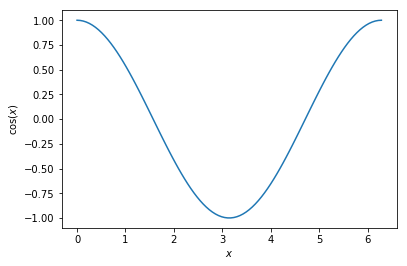

In [44]:
x = np.linspace(0, 2*np.pi, 100)
y = np.cos(x)

plt.plot(x, y)

plt.ylabel('cos($x$)')
plt.xlabel('$x$')

# this last part often isn't necessary in a Jupyter notebook
plt.show();

We can use the `%matplotlib notebook` command to vary how the figures appear in our notebook. For example, we can zoom in or pan around the figure. If we just want a static image, we can use `%matplotlib inline`.

In [45]:
%matplotlib inline

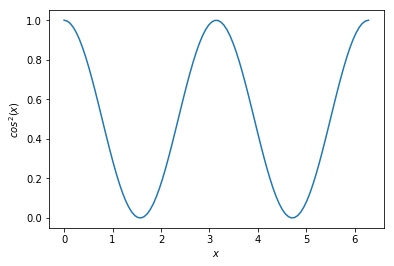

In [46]:
plt.plot(x, y**2)
plt.ylabel(r'$cos^2(x)$')
plt.xlabel('$x$'); # note that the semicolon suppresses text from appearing in the Jupyter cell

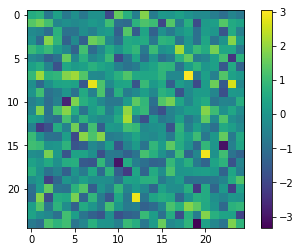

In [47]:
noise = np.random.randn(25, 25)

plt.imshow(noise)
plt.colorbar();

Let's make some asthetic adjustments.

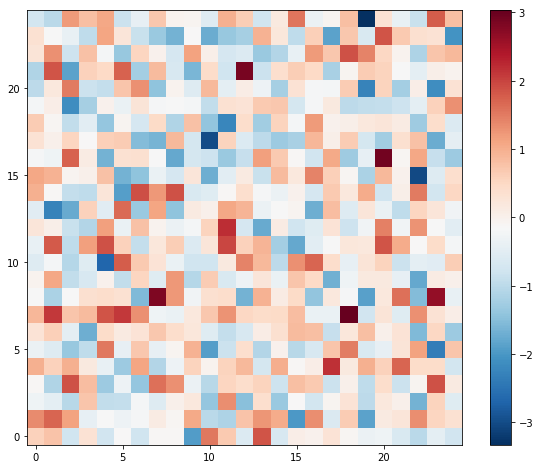

In [48]:
plt.figure(figsize=(10, 8))
plt.imshow(noise, origin='lower', cmap='RdBu_r')
plt.colorbar();

## Methods

In [49]:
def hello_world():
    print('Hello world!')

hello_world()

Hello world!


In [50]:
def say_hello(name):
    """Prints `Hello, <name>!`"""
    print('Hello {}!'.format(name))
    
say_hello('Nebuchadnezzar')

Hello Nebuchadnezzar!


In [51]:
# note: we can not overload a method this way
def say_hello(first_name, last_name):
    """Prints `Hello, <first> <last>!"""
    print('Hello {} {}!'.format(first_name, last_name))

my_name = ('John', 'Wu')

# the asterisk means that the tuple should be unpacked into two separate and unnamed variables
say_hello(*my_name)

Hello John Wu!
